# Group Final Report: Data Science Salary Prediction

Group 8: Zoey Ma, Anthony Le

In [49]:
library(repr)
library(infer)
library(gridExtra)
library(mlbench)
library(AER)
library(ISLR)
library(broom)
library(qqplotr)
library(performance)
library(GGally)
library(see)
library(MASS)
library(glmbb)
library(cowplot)
library(tidyverse)
library(gridExtra)
library(grid)
library(ggplot2)
library(latex2exp)
library(tidymodels)
library(repr)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(modelr)
set.seed(4444)

## Introduction

### Dataset Description

For the project, we will use the dataset `ds_salaries`, which contains data on salaries of jobs in the Data Science domain. It has  **606 observations** and **11 variables**.

The data come from [kaggle](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/data) and the data is aggregated by [ai-jobs.net Salaries](https://ai-jobs.net/salaries/form/). The dataset is published by Ruchi Bhatia in 2022.


In the [source documentation](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/data) you can find the definition of each of the selected variables:

- `work_year`:The year the salary was paid.

- `experience_level`: The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director.

-  ` employment_type`: The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance.

-  ` job_title`:The role worked in during the year.

-  ` salary`:The total gross salary amount paid.

-  `salary_currency `: The currency of the salary paid as an ISO 4217 currency code.

-  `salary_in_usd `:The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).


-  `employee_residence`: Employee's primary country of residence in during the work year as an ISO 3166 country code.

-  `remote_ratio `:The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%).

-  `company_location `:The country of the employer's main office or contracting branch as an ISO 3166 country code.

-  ` company_size`:The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large).

### Background Info 

- Data science has emerged as one of the most sought-after career fields in the modern job market, characterized by a unique blend of analytical skills, statistical knowledge, and programming expertise. As organizations increasingly rely on data-driven decision-making, the demand for skilled data scientists has skyrocketed, making it one of the most lucrative professions. The salary for data science roles varies widely based on factors such as experience level, industry, geographic location, and the specific skills required for the job. Typically, data science professionals command impressive salaries, reflecting their critical role in harnessing data to derive actionable insights and drive business growth. With the continuous evolution of technology and the growing importance of big data, data science salaries are expected to remain competitive and continue rising, offering attractive prospects for those entering the field.

- The objective is to develop a robust predictive model to estimate salary_in_usd based on various of predictors. The analysis aims to identify the key factors affecting salary levels. By investigating the factors influencing salary_in_usd, this study aims to complement existing research by providing a deeper understanding of salary determinants in the evolving data science job market.

### Question
- `salary_in_usd ` will be using as the response varibale instead of `salary` since `salary` is in different units of currency therefore lack of consistency for data analyzation. 

- Can a predictive model being built using the selected predictors `experience_level` and `remote_ratio` to predict the response `salary_in_usd `?   What other factors significantly influence `salary_in_usd `in the data science job market for prediction purpose? 

### Alignning with current scientific progress
Existing academic literature has shown trends where salary increases as an employees experience level goes up. This has been observed in the marketing industry, where a study was conducted on what affects a marketer's salary. They found that jobs requiring no industry experience paid $4,342 USD less than a job that requires some industry experience (Schlee and Karns, 2017). Additionally, the effect of experience level on salary has been explored within the data science field as well. In a study conducted by Tee Zhen Quan and Mafas Raheem, they created a predictive model based on data science salaries and found that the salaries of employees increased with promotion to higher positions (Quan and Raheem, 2023).
This study aligns with existing literature on salary prediction and the impact of work arrangements. The study on the Saudi labor market highlighted the limitations of traditional MLR models and the superiority of non-linear ML approaches in predicting salaries across various occupations and industries. While this current analysis employs a multiple linear regression approach, the findings from previous research suggest that exploring non-linear methods could potentially enhance prediction accuracy. This study will provide insights into the effectiveness of MLR in the context of remote and hybrid work in the data science field, offering a basis for further exploration of advanced ML techniques. 


## Methods and Results

### (a) Exploratory Data Analysis (EDA)

In [50]:
# Main developer: Zoey
ds_salaries <- read_csv("ds_salaries.csv")

New names:
• `` -> `...1`
Rows: 607 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (5): ...1, work_year, salary, salary_in_usd, remote_ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [51]:
# Main developer: Zoey

# data cleaning and wrangling 
# First, the rows with missing values will be removed
# Second, we will be dropping salary and salary_currency since only salary_in_usd will be used as response
# Third, identifying the categorical input and convert each one to a corresponding categorical level using factor()

salaries_clean <- ds_salaries |>
        drop_na()|>
        select(- salary, - salary_currency)|>
        mutate(remote_ratio = factor(remote_ratio, levels = c(0, 50, 100), labels = c("noRemote", "halfRemote", "fullRemote")),
               work_year = factor(work_year),
              experience_level = factor(experience_level),
              employment_type = factor(employment_type),
              company_size = factor(company_size),
               job_title = factor(job_title),
               company_location = factor(company_location),
               employee_residence = factor(employee_residence)
              )


## Determine the levels for each variables   
cat("Number of work Year Levels: ", nlevels(salaries_clean$work_year), "\n\n")
cat("Number of Employment Type Levels: ", nlevels(salaries_clean$employment_type), "\n\n")
cat("Number of Experience level Levels: ", nlevels(salaries_clean$experience_level), "\n\n")
cat("Number of Job Title Levels: ", nlevels(salaries_clean$job_title), "\n\n")
cat("Number of Employee residence Levels: ", nlevels(salaries_clean$employee_residence), "\n\n")
cat("Number of Ramote Ratio Levels: ", nlevels(salaries_clean$remote_ratio), "\n\n")
cat("Number of Company Location Levels: ", nlevels(salaries_clean$company_location), "\n\n")
cat("Number of Company Size Levels: ", nlevels(salaries_clean$company_size), "\n\n")

Number of work Year Levels:  3 

Number of Employment Type Levels:  4 

Number of Experience level Levels:  4 

Number of Job Title Levels:  50 

Number of Employee residence Levels:  57 

Number of Ramote Ratio Levels:  3 

Number of Company Location Levels:  50 

Number of Company Size Levels:  3 



#### Visualization
- First we will examine the overall distribution of salary_in_usd

- We will present the boxplot of each selected input variables against the reponse, because the input are categorical, thus boxplots will help us understanding how salaries vary with different levels of input varibales. They highlight the distribution, median, and potential outliers.

- To ensure the mainfocus and avoid overfitting, we don't consider Job title with levels 50, employee residence with level 57 and company location with level 50.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


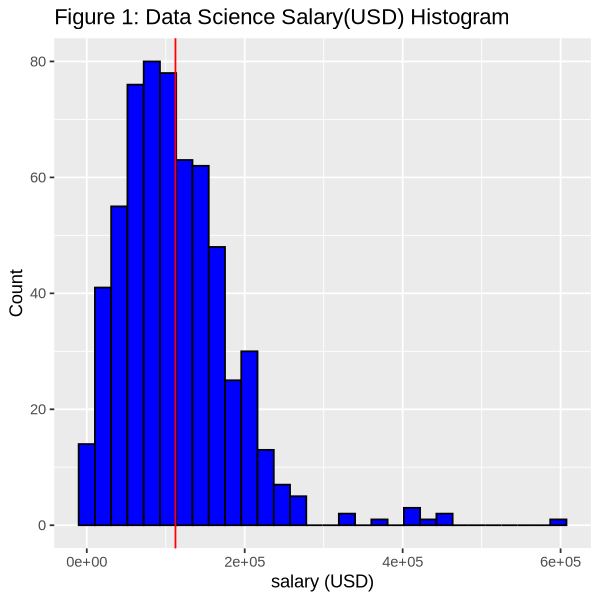

In [52]:
# Main developer: Zoey 

histogram_salary <- salaries_clean |>
    ggplot(color = 'blue')+
    geom_histogram(aes(x = salary_in_usd), color = 'black', fill = 'blue')+
    geom_vline(xintercept = mean(salaries_clean$salary_in_usd), color = 'red')+
    ggtitle("Figure 1: Data Science Salary(USD) Histogram") +
    xlab("salary (USD)") +
    ylab("Count")
histogram_salary

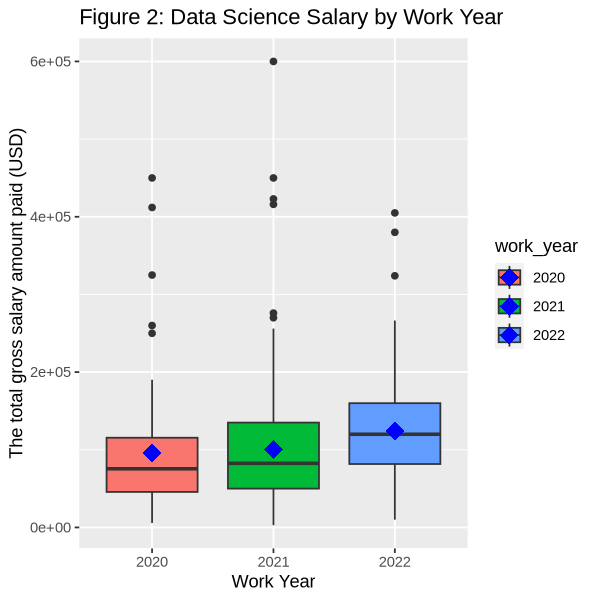

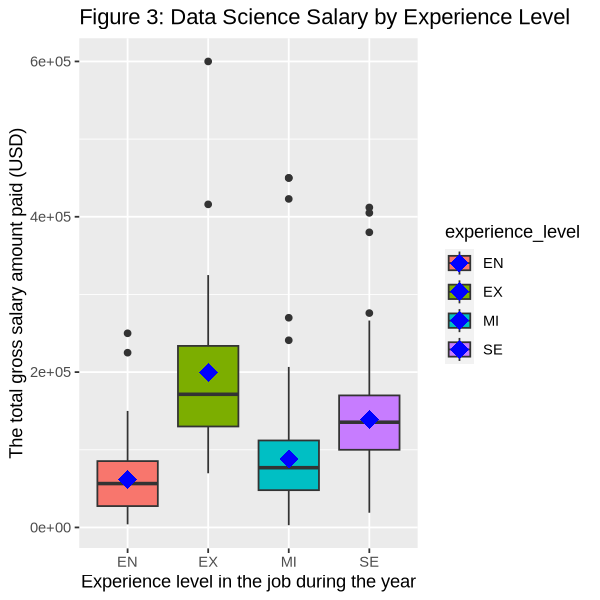

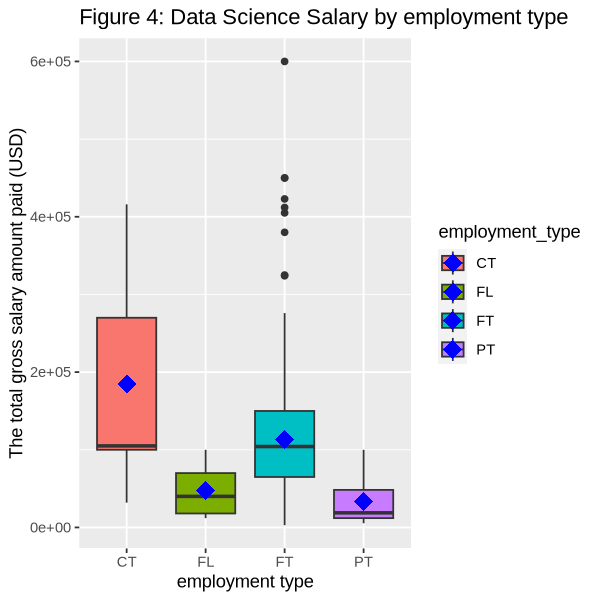

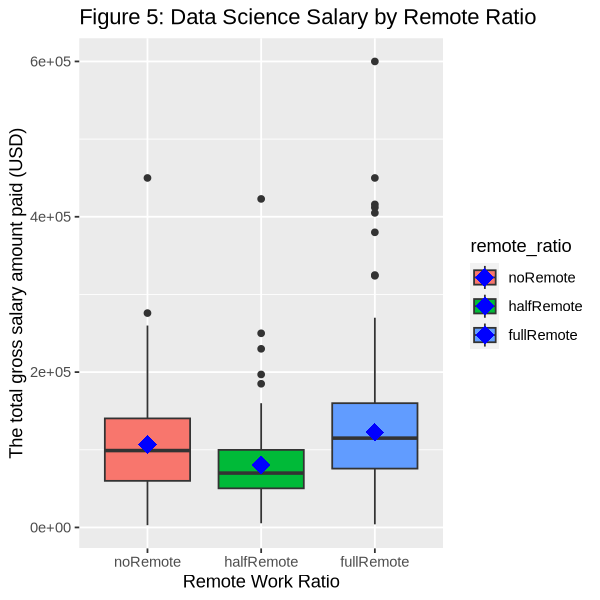

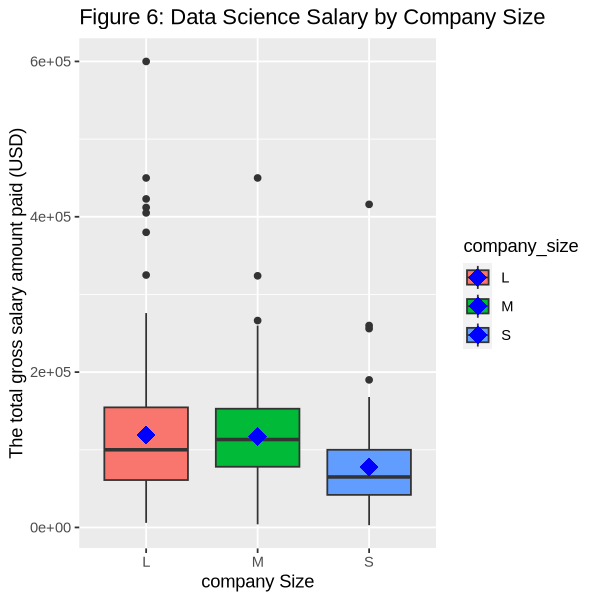

In [53]:
# Main developer: Zoey 

# Plot for Work Year
p1 <- salaries_clean %>%
    ggplot(aes(x = work_year, y = salary_in_usd, fill = work_year)) +
    geom_boxplot() +
    ggtitle("Figure 2: Data Science Salary by Work Year") +
    xlab("Work Year") +
    ylab("The total gross salary amount paid (USD)") +
    stat_summary(aes(x = work_year, y = salary_in_usd),
                 fun = mean, colour = "blue", geom = "point",
                 shape = 18, size = 5)

# Plot for experience level
p2 <- salaries_clean %>%
    ggplot(aes(x = experience_level, y = salary_in_usd, fill = experience_level)) +
    geom_boxplot() +
    ggtitle("Figure 3: Data Science Salary by Experience Level") +
    xlab("Experience level in the job during the year") +
    ylab("The total gross salary amount paid (USD)") +
    stat_summary(aes(x = experience_level, y = salary_in_usd),
                 fun = mean, colour = "blue", geom = "point",
                 shape = 18, size = 5)

# Plot for exployment type
p3 <- salaries_clean %>%
    ggplot(aes(x = employment_type, y = salary_in_usd, fill = employment_type)) +
    geom_boxplot() +
    ggtitle("Figure 4: Data Science Salary by employment type") +
    xlab("employment type") +
    ylab("The total gross salary amount paid (USD)") +
    stat_summary(aes(x = employment_type, y = salary_in_usd),
                 fun = mean, colour = "blue", geom = "point",
                 shape = 18, size = 5)

# Plot for remote ratio
p6 <- salaries_clean %>%
    ggplot(aes(x = remote_ratio, y = salary_in_usd, fill = remote_ratio)) +
    geom_boxplot() +
    ggtitle("Figure 5: Data Science Salary by Remote Ratio") +
    xlab("Remote Work Ratio") +
    ylab("The total gross salary amount paid (USD)") +
    stat_summary(aes(x = remote_ratio, y = salary_in_usd),
                 fun = mean, colour = "blue", geom = "point",
                 shape = 18, size = 5)


# Plot for company size 
p8 <- salaries_clean %>%
    ggplot(aes(x = company_size, y = salary_in_usd, fill = company_size)) +
    geom_boxplot() +
    ggtitle("Figure 6: Data Science Salary by Company Size") +
    xlab("company Size") +
    ylab("The total gross salary amount paid (USD)") +
    stat_summary(aes(x = company_size, y = salary_in_usd),
                 fun = mean, colour = "blue", geom = "point",
                 shape = 18, size = 5)

options(repr.plot.width = 5, repr.plot.height = 5) 
p1
p2
p3
p6
p8

### Observation
For thr chosen two varibles:
- The mean salary shows a noticeable change with the experience level and remote ratio.

- Executive level seems to have a higher mean salary and the second highest mean salary is senior level, followed by mid level and entry level.

- Remote ratio didn't show a pattern as obvious as experience level; however, we can still see that the mean salary for fully remote is higher than no remote, and then the lowest mean salary is half remote. 

For other varibles: 
- There are all some more or less change with the mean salary corresponding to different levels for each input varibles. 

### (b) Methods: Plan

#### Method Description:

The goal of this analysis is to predict salary_in_usd using a multiple linear regression model with various predictors. The dataset is not time-series data, and the response variable is continuous.

1. The dataset was randomly split into training (60%) and test (40%) sets. 

2. A full multiple linear regression model was fitted using all predictors on the training set. We checked key assumptions like linearity, independence, homoscedasticity, and normality of residuals. We used the Variance Inflation Factor (VIF) to quantify multicollinearity. Predictors with VIF values above 5 or 10 were considered for removal or transformation.

3. And since there's no multicolinearity presnet and we aim for predictionpurpose, we choose to use stepwise selection algorithms (forward) were used to determine the most relevant predictors based on criteria like BIC and Cp value.

4. Finally, we evaluate the performance of the best model using measures for the test set, like RMSE, R-squared, adjusted R-squared


With respect to the work that has already been done on data science datasets, as well as the complexity of the interactions between variables, we aim to build the most robust predictive  model we can through employing concepts explored in class.



In [54]:
#Main Developer: Zoey 
# salaries_clean <- salaries_clean|>
#  select(-job_title, -employee_residence, -company_location)
salary_split <- salaries_clean|>
    initial_split(prop = 0.6, strata = salary_in_usd)

training_salary <- training(salary_split)
testing_salary <- testing(salary_split)

### Assumptions Check

Warning message:
“'tidy.numeric' is deprecated.
See help("Deprecated")”


names,x
<chr>,<dbl>
work_year2021,2.618210
work_year2022,3.528298
experience_levelEX,1.249066
experience_levelMI,2.201330
experience_levelSE,2.420446
employment_typeFL,1.792293
employment_typeFT,3.545592
employment_typePT,2.801868
remote_ratiohalfRemote,1.681631


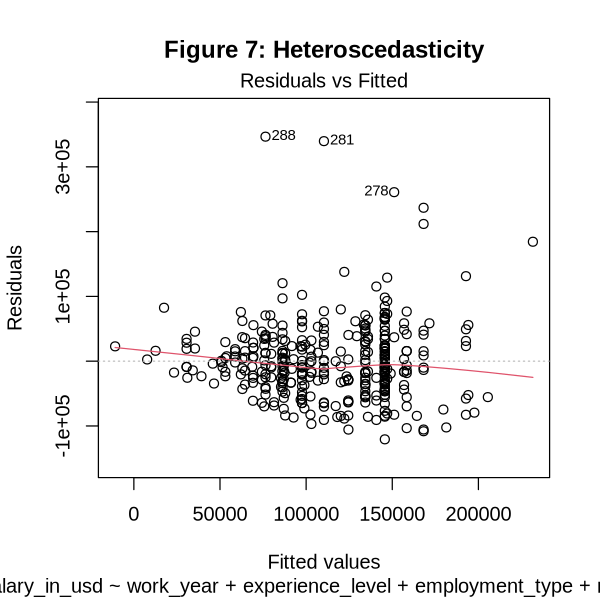

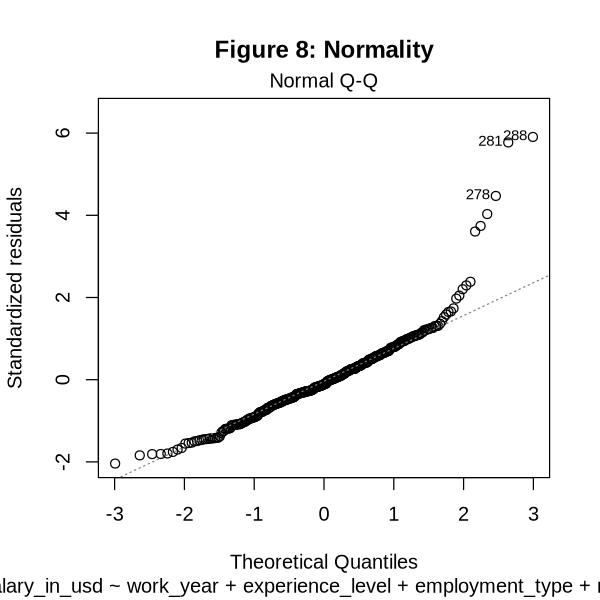

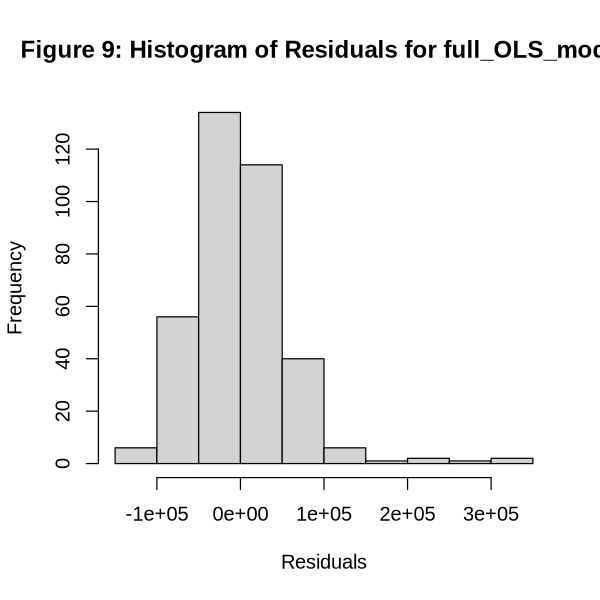

In [55]:
#Main Developer: Zoey

# Multicolinearity 
full_OLS_model = lm(salary_in_usd ~ work_year + experience_level+ employment_type + remote_ratio + company_size, data = training_salary)
tidy(vif(full_OLS_model))

#checking for Heteroscedasticity
plot(full_OLS_model, 1, main = "Figure 7: Heteroscedasticity")

# checking for normality
plot(full_OLS_model, 2, main = "Figure 8: Normality")

hist(residuals(object = full_OLS_model),
  breaks = 10,
  main = "Figure 9: Histogram of Residuals for full_OLS_model",
  xlab = "Residuals"
)

- VIF values greater than 5-10 suggest high multicollinearity. We can see that there isn't serious multicolinearity present in the data.

- Heteroscedasticity is detected by residual and fitted values plot, this could lead to future biased prediction. 

- The QQ plot shows that the sample data is not exactly normal. However, in this case, the sample size is large so, according to the CLT, the sampling distributions when  𝜎
  is known is approximately Normal.

In [65]:
#Main Developer: Zoey 

original_model <- lm(salary_in_usd ~ experience_level+ remote_ratio, data = training_salary )
tidy(original_model)

test_pred_full <- predict(original_model, newdata = testing_salary)

original_RMSE_models <- 
    tibble(
        Model = "OLS Full Regression",
        RMSE = rmse(model = original_model, data = testing_salary)
    )


forward_sel <- regsubsets(x = salary_in_usd ~ work_year + experience_level+ employment_type + remote_ratio + company_size ,
                              nvmax = 12,
                              data = training_salary,
                              method = "forward")

fwd_summary <- summary(forward_sel)

fwd_summary <- tibble(
   n_input_variables = 1:12,
   RSS = fwd_summary$rss,
   BIC = fwd_summary$bic,
   Cp = fwd_summary$cp
)

fwd_summary


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),62863.20,10054.458,6.252271,1.158316e-09
experience_levelEX,125589.50,17441.729,7.200519,3.591904e-12
experience_levelMI,24576.16,9635.466,2.550594,1.117189e-02
experience_levelSE,73755.85,9329.817,7.905390,3.383531e-14
remote_ratiohalfRemote,-22885.70,10143.930,-2.256098,2.467074e-02
remote_ratiofullRemote,12298.14,7648.360,1.607945,1.087337e-01


n_input_variables,RSS,BIC,Cp
<int>,<dbl>,<dbl>,<dbl>
1,1.541193e+12,-42.55238,78.45760
2,1.377551e+12,-77.29488,34.11525
3,1.321548e+12,-86.42768,20.25531
4,1.299311e+12,-86.67890,15.95807
5,1.283915e+12,-85.10229,13.59805
6,1.271941e+12,-82.60276,12.20687
7,1.258327e+12,-80.60668,10.35138
8,1.250496e+12,-76.97492,10.13369
9,1.244699e+12,-72.76513,10.49220


Metrics such as $C_p$, AIC and BIC are computed with the training set and can be used to approximate the test MSE, without looking at the test data.

In [57]:
# Main developer: Zoey 

# selection_model <- lm(salary_in_usd ~ + experience_level+ employment_type + remote_ratio + company_size, data = training_salary)

 selection_model <- lm(salary_in_usd ~ work_year + experience_level+ employment_type + remote_ratio + company_size, data = training_salary)
RMSE_models_expanded <- 
    rbind(original_RMSE_models,
          tibble(
              Model = "Predictive Model after Forward Selection",
              RMSE = rmse(model = selection_model,
                          data = testing_salary))
    )

RMSE_models_expanded

glance_model_original<-glance(original_model)
glance_model_selection<-glance(selection_model)

adj_r2_original_model <- glance_model_original$adj.r.squared
adj_r2_selection_model <- glance_model_selection$adj.r.squared

r2_original_model<- glance_model_original$r.squared
r2_selection_model<- glance_model_selection$r.squared

model_selection_table <- 
    tibble(
        model = c("r2_original_model" ,"r2_selection_model"),
        r.squared = c(r2_original_model, r2_selection_model),
        adj.r.squared = c(adj_r2_original_model, adj_r2_selection_model))
model_selection_table

Model,RMSE
<chr>,<dbl>
OLS Full Regression,63060.16
Predictive Model after Forward Selection,62001.92


model,r.squared,adj.r.squared
<chr>,<dbl>,<dbl>
r2_original_model,0.2796781,0.2695613
r2_selection_model,0.3118289,0.2881669


- The RMSE is fairly large for both models, this is due to the fact that the response varible's unit itself (USD) and average is fairly large. the RMSE alone doesn't tell much without knowing the var(Y). So we will continue to check the $R^2$.

- The original model has an $R^2$ of approximately 0.2796, meaning that about 27.96% of the variance in salary_in_usd is explained by experience_level and remote_ratio.

- The selection model has a higher $R^2$ of approximately 0.3118, indicating that about 31.18% of the variance in salary_in_usd is explained by the predictors in this model (work_year, experience_level, employment_type, remote_ratio, and company_size).

**The increase in $R^2$ from the original to the selection model suggests that the additional predictors help to better explain the variability in salary_in_usd.**

- The original model's adjusted $R^2$ is approximately 0.269, accounting for the number of predictors and the sample size.

- The selection model's adjusted $R^2$ is approximately 0.288, which has increased.

**The adjusted $R^2$ accounts for the number of predictors relative to the number of observations and adjusts for adding variables that don't improve the model much. The increase in adjusted $R^2$ indicates that the additional variables in the selection model provide genuine explanatory power and are not merely increasing $R^2$ due to the model's complexity.**



## Ridge

In [67]:
#Main developer: Zoey

salary_X_train <- model.matrix(object = salary_in_usd ~ .,
  data = training_salary)[, -1]
salary_Y_train <- as.numeric(unlist(training_salary[, "salary_in_usd"]))


salary_X_test <- model.matrix(object = salary_in_usd ~ .,
  data = testing_salary)[, -1]

salary_Y_test <- testing_salary[, "salary_in_usd"]

salary_cv_lambda_ridge <- cv.glmnet(
  x = salary_X_train, y = salary_Y_train,
  alpha = 0,
  lambda = exp(seq(-5, 10, 0.1))
)

plot_data <- salary_cv_lambda_ridge

salary_test_pred_full_OLS <- predict(full_OLS_model, testing_salary)

salary_R_MSE_models <- tibble(
  Model = "OLS Full Regression",
  R_MSE = mltools::rmse(
    preds = salary_test_pred_full_OLS,
    actuals = testing_salary$salary_in_usd
  )
)

salary_ridge_min_coef <- coef(salary_cv_lambda_ridge, s = salary_cv_lambda_ridge$lambda.min)

salary_test_pred_ridge_min <- predict(salary_cv_lambda_ridge,
  newx = salary_X_test, s= salary_cv_lambda_ridge$lambda.min)

salary_R_MSE_models <- rbind(
  salary_R_MSE_models,
  tibble(
    Model = "Ridge Regression with minimum MSE",
    R_MSE = mltools::rmse(
       preds = salary_test_pred_ridge_min,
       actuals = testing_salary$salary_in_usd
  )
))


 salary_R_MSE_models


ridge_r_squared <- cor(salary_Y_test, salary_test_pred_ridge_min)^2


r2_table <- 
    tibble(
        model = c("r2_original_model" ,"r2_selection_model", "r2_Ridge"),
        r.squared = c(r2_original_model, r2_selection_model, ridge_r_squared ))
r2_table

Model,R_MSE
<chr>,<dbl>
OLS Full Regression,62001.92
Ridge Regression with minimum MSE,51708.29


model,r.squared
<chr>,<dbl>
r2_original_model,0.2796781
r2_selection_model,0.3118289
r2_Ridge,0.4847671


The Ridge Regression model has a much lower RMSE of 51708.29 compared to 62001.92 and higher R-squared of 0.4847 compared to the full model of 0.2796. This suggests that Ridge Regression, with its ability to penalize large coefficients and thus reduce the effect of multicollinearity, is a more suitable model for this dataset. 

## Discussion

#### Summary of findings
The R-squared value indicates the proportion of the variance in the dependent variable (salary_in_usd) that is predictable from the independent variables. In this context, the R-squared value of 0.4847671 for Ridge Regression means that approximately 48.48% of the variance in salaries can be explained by the predictors used in the model. This is significantly higher than the R-squared values for both the original and selection models, which were 27.97% and 31.18%, respectively.

The higher R-squared in Ridge Regression suggests that the model has improved its ability to explain the variability in the data by effectively balancing the trade-off between bias and variance, reducing the impact of less relevant or noisy features.

#### Possible Improvements
Consider more complex models that are non-linear to build the predictive model since relationships between predictors that may not be captured by the linear model.

## Reference


Arudan, L. Data Science Labor Market Analysis: Understanding the Shift towards Remote and Hybrid Work. Proceedings of the INTERNATIONAL MANAGEMENT CONFERENCE 2022, 16 (1), 727–738. https://doi.org/10.24818/IMC/2022/04.15.

Bhatia, R. Data Science Job Salaries. www.kaggle.com. https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/data (accessed 2024-08-03).

Kaur, A., Verma, D., & Kaur, N. (2022). Utilizing quantitative data science salary analysis to predict job salaries. Paper presented at the 1-4. https://doi.org/10.1109/CISCT55310.2022.10046491

Matbouli, Y. T., & Alghamdi, S. M. (2022). Statistical machine learning regression models for salary prediction featuring economy wide activities and occupations. Information (Basel), 13(10), 495. https://doi.org/10.3390/info13100495

Quan, Tee Zhen, and Mafas Raheem. “Human resource analytics on data science employment based on specialized skill sets with salary prediction.” International Journal of Data Science, vol. 4, no. 1, 20 May 2023, pp. 40–59, https://doi.org/10.18517/ijods.4.1.40-59.2023.

Schlee, R. P., & Karns, G. L. (2017). Job Requirements for Marketing Graduates: Are There Differences in the Knowledge, Skills, and Personal Attributes Needed for Different Salary Levels? Journal of Marketing Education, 39(2), 69-81. https://doi.org/10.1177/0273475317712765